
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [34]:
print('Num GPUs Avaliable: ', len(tf.config.list_physical_devices('GPU')))

Num GPUs Avaliable:  1


## The Data

**Download the fashion mnist dataset using Keras.**

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [37]:
len(x_train)

60000

In [38]:
len(y_train)

60000

In [39]:
len(x_test)

10000

In [40]:
len(y_test)

10000

In [41]:
x_train.shape

(60000, 28, 28)

In [42]:
x_train[10].shape

(28, 28)

In [43]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

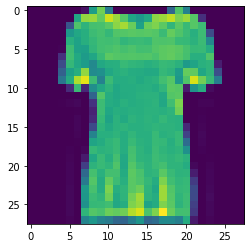

In [44]:
plt.imshow(x_train[10]);

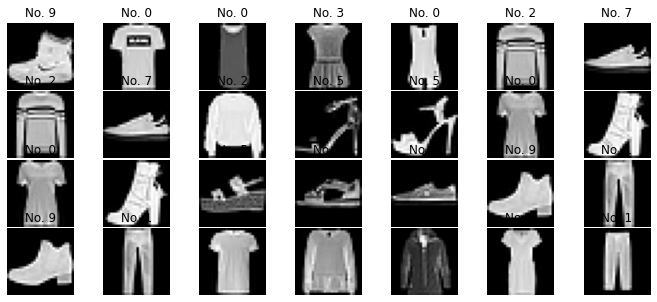

In [45]:
num_rows, num_cols = 4, 7      
f, ax = plt.subplots(4, 7, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [46]:
x_train.max()

255

In [47]:
x_train.min()

0

In [48]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [49]:
x_train.min()

0.0

In [50]:
x_train.max()

1.0

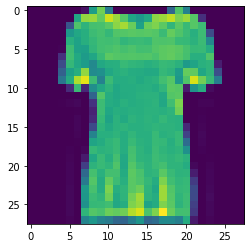

In [51]:
plt.imshow(x_train[10]);

**Reshape the X into 4 dimension**

In [104]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [105]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [106]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [55]:
from tensorflow.keras.utils import to_categorical

In [56]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [57]:
Y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

In [65]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               605824    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                      

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [67]:
model.fit(x_train, Y_train, batch_size=32, epochs=10, validation_data=(x_test,Y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4127 - accuracy: 0.8511 - val_loss: 0.3507 - val_accuracy: 0.8712
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2767 - accuracy: 0.9011 - val_loss: 0.2984 - val_accuracy: 0.8999
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2416 - accuracy: 0.9134 - val_loss: 0.2848 - val_accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2219 - accuracy: 0.9214 - val_loss: 0.2812 - val_accuracy: 0.9047
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2114 - accuracy: 0.9264 - val_loss: 0.3043 - val_accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2035 - accuracy: 0.9294 - val_loss: 0.3126 - val_accuracy: 0.9043
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1988 - accuracy: 0.9315 - val_loss: 0.3495 - val_ac

**Plot values of metrics you used in your model.**

In [68]:
summary= pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412694,0.851083,0.350740,0.8712
1,0.276670,0.901117,0.298450,0.8999
2,0.241614,0.913367,0.284760,0.8986
3,0.221896,0.921417,0.281180,0.9047
4,0.211407,0.926383,0.304272,0.9038


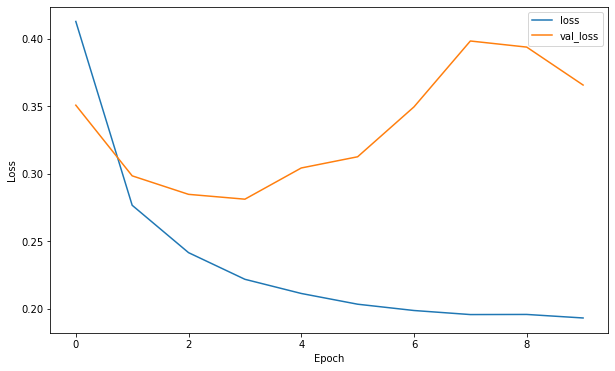

In [69]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

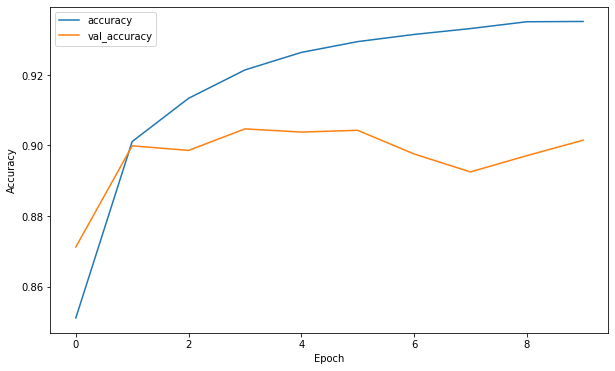

In [70]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

**Train the model using earlystop.**

In [71]:
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [74]:
model.fit(x_train, Y_train, batch_size=32, epochs=32, validation_data=(x_test,Y_test),callbacks=[early_stop])

Epoch 1/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1841 - accuracy: 0.9383 - val_loss: 0.4609 - val_accuracy: 0.9036
Epoch 2/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1876 - accuracy: 0.9390 - val_loss: 0.4410 - val_accuracy: 0.9032
Epoch 3/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1869 - accuracy: 0.9388 - val_loss: 0.3737 - val_accuracy: 0.8992
Epoch 4/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1793 - accuracy: 0.9415 - val_loss: 0.4410 - val_accuracy: 0.9043
Epoch 5/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1756 - accuracy: 0.9421 - val_loss: 0.5001 - val_accuracy: 0.8925
Epoch 6/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1747 - accuracy: 0.9438 - val_loss: 0.5047 - val_accuracy: 0.8994
Epoch 7/32
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1733 - accuracy: 0.9455 - val_loss: 0.4983 - val_ac

**Plot values of metrics you used in your model.**

In [75]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.184116,0.938267,0.460883,0.9036
1,0.187562,0.939033,0.441003,0.9032
2,0.186948,0.938850,0.373693,0.8992
3,0.179289,0.941533,0.440973,0.9043
4,0.175639,0.942150,0.500131,0.8925


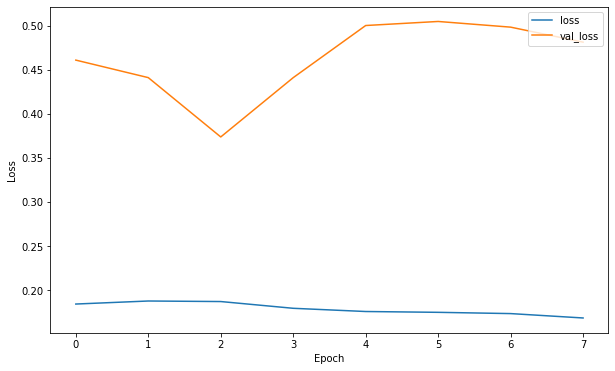

In [76]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

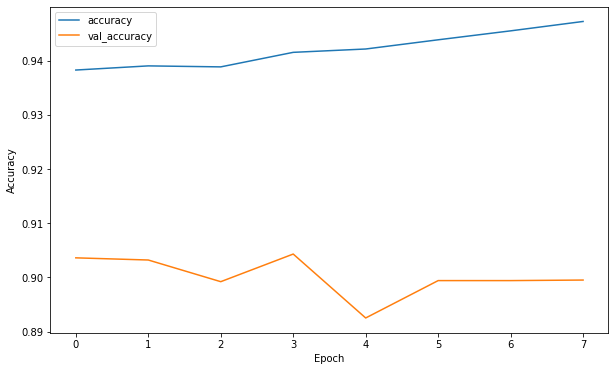

In [77]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [78]:
model.metrics_names

['loss', 'accuracy']

In [79]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4812 - accuracy: 0.8995


[0.4812321662902832, 0.8995000123977661]

In [83]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [84]:
preds = model.predict(x_test)
preds

array([[1.2918872e-14, 5.2812885e-21, 1.8166660e-17, ..., 8.0721356e-13,
        3.1551408e-14, 1.0000000e+00],
       [2.2192278e-26, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.4504772e-26, 1.0000000e+00, 7.8579759e-34, ..., 0.0000000e+00,
        1.5183252e-27, 0.0000000e+00],
       ...,
       [1.3989751e-21, 0.0000000e+00, 1.8740767e-31, ..., 8.8111504e-37,
        1.0000000e+00, 0.0000000e+00],
       [9.4286243e-25, 1.0000000e+00, 5.9748527e-30, ..., 0.0000000e+00,
        2.1086163e-24, 0.0000000e+00],
       [6.6089267e-03, 1.3394969e-05, 4.2133168e-05, ..., 1.9223619e-02,
        1.8811978e-01, 8.5200591e-04]], dtype=float32)

In [85]:
predictions= np.argmax(preds, axis=1)

In [86]:
len(predictions)

10000

In [87]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [88]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.92      0.75      0.83      1000
           3       0.86      0.95      0.90      1000
           4       0.80      0.89      0.84      1000
           5       0.97      0.98      0.97      1000
           6       0.77      0.69      0.73      1000
           7       0.98      0.93      0.95      1000
           8       0.94      0.99      0.96      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [89]:
print(confusion_matrix(y_test, predictions))

[[868   0   6  27   4   1  85   0   9   0]
 [  1 979   0  13   2   0   1   0   4   0]
 [ 22   0 754  18 129   0  70   0   7   0]
 [  9  10   4 948   9   0  15   0   5   0]
 [  2   1  18  52 885   0  38   0   4   0]
 [  1   0   0   0   0 979   0   4   3  13]
 [127   1  41  42  78   0 691   0  20   0]
 [  0   0   0   0   0  24   0 928  11  37]
 [  3   2   1   3   1   1   1   0 988   0]
 [  1   0   0   0   0   7   1  16   0 975]]


In [91]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4812321662902832
Test accuracy: 0.8995000123977661


# Prediction

In [118]:
model.predict(x_test)

array([[1.2918872e-14, 5.2812885e-21, 1.8166660e-17, ..., 8.0721356e-13,
        3.1551408e-14, 1.0000000e+00],
       [2.2192278e-26, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [9.4504772e-26, 1.0000000e+00, 7.8579759e-34, ..., 0.0000000e+00,
        1.5183252e-27, 0.0000000e+00],
       ...,
       [1.3989751e-21, 0.0000000e+00, 1.8740767e-31, ..., 8.8111504e-37,
        1.0000000e+00, 0.0000000e+00],
       [9.4286243e-25, 1.0000000e+00, 5.9748527e-30, ..., 0.0000000e+00,
        2.1086163e-24, 0.0000000e+00],
       [6.6089267e-03, 1.3394969e-05, 4.2133168e-05, ..., 1.9223619e-02,
        1.8811978e-01, 8.5200591e-04]], dtype=float32)

In [112]:
len(x_test)

10000

In [134]:
my_number = x_test[5]

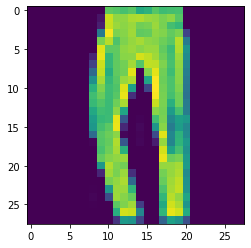

In [135]:
plt.imshow(my_number.reshape(28,28)); 

In [136]:
model.predict(my_number.reshape(1,28,28,1))

array([[7.7423038e-23, 1.0000000e+00, 5.6628791e-30, 3.1587480e-25,
        4.1940537e-27, 1.0137614e-31, 5.0226298e-28, 6.7669891e-37,
        2.9211822e-20, 0.0000000e+00]], dtype=float32)

In [137]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1])


    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot



# End of Assignment

In [141]:
model.save("cnn-1.h5")